# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
from sklearn.decomposition import PCA

# Importing Dataset

In [2]:
df = pd.read_csv('HR_Employee_Attrition.csv')

In [3]:
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#H- printing no.of columns and rows in the dataset
df.shape

(2940, 35)

In [5]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
#H-Giving the null values
df.isna().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#H-This gives the percentages of null values present in the each column 
df.isna().sum()/df.shape[0]*100

EmployeeNumber              0.0
Attrition                   0.0
Age                         0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [8]:
#Get the values from attrition column from dataset
df['Attrition'].value_counts()
#2466 ppl stays & 474 ppl leaves

No     2466
Yes     474
Name: Attrition, dtype: int64

Text(0.5, 1.0, 'Attrition Probability')

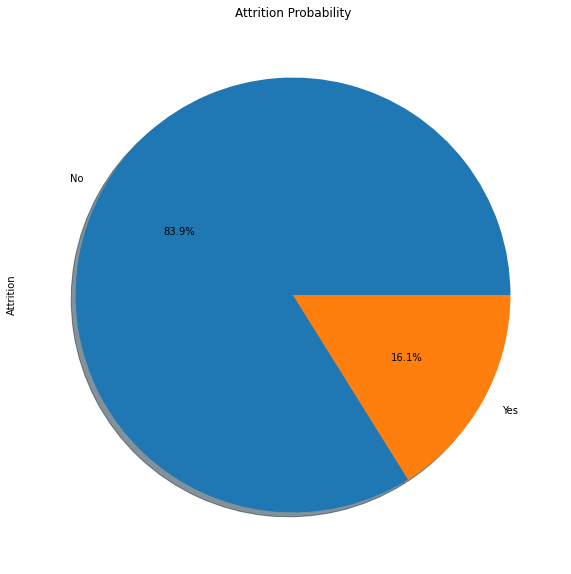

In [9]:
#H-Plotting a piechart of the 'attrition' values,autopct gives the percentage plotting in the piechart
f, ax = plt.subplots(figsize=(10,10))
ax = df['Attrition'].value_counts().plot.pie( explode=[0,0],autopct = '%1.1f%%', shadow=True)
ax.set_title('Attrition Probability')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

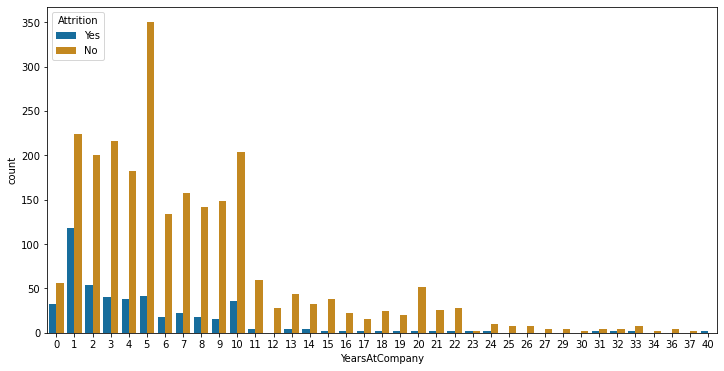

In [10]:
#H-Yearsatcompany Vs attrition countplot
plt.subplots(figsize=(12,6))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df, palette='colorblind')

<AxesSubplot:xlabel='Age', ylabel='count'>

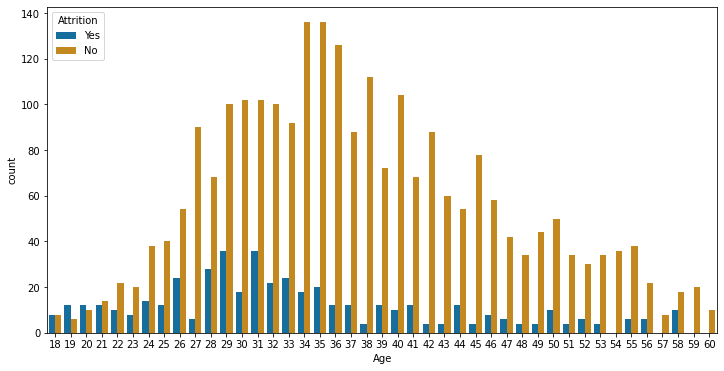

In [11]:
#H-age feature V attrition countplot
plt.subplots(figsize=(12,6))
sns.countplot(x='Age',hue='Attrition',data=df,palette='colorblind')

In [12]:
#H-iterating to see categorical columns printing the unique values in each feature
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+':'+ str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------')

Attrition:['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64
---------------------------------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
---------------------------------------------------
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
---------------------------------------------------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
---------------------------------------------------
Gender:['Female' 'Male']
Male      1764
Female    1176
Name: G

# Encoding Categorical Values

In [13]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

# Seperating into X and y

In [14]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,replacement=True)
X_, Y1 = rus.fit_resample(X,y)
X1 = pd.DataFrame(X_,columns=X.columns)

ros = RandomOverSampler(random_state=42)
X_, Y2 = ros.fit_resample(X,y)
X2 = pd.DataFrame(X_,columns=X.columns)

# UnderSampling

In [16]:
X=X1
y=Y1

# Spliting into Train and Test Sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Feature Scaling

PCA

20 PCs explain  [73.62735475 99.76419398] % of variance cumulatively


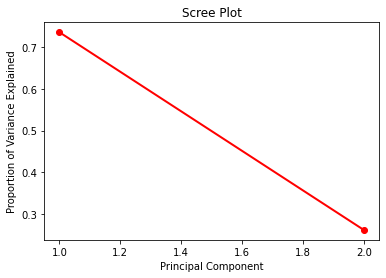

In [18]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print('20 PCs explain ', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
#print(pca.explained_variance_ratio_)
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Standardization

20 PCs explain  [17.08296407 23.73983618 30.12707273 35.58173819 40.54041779 44.64320503
 48.69127742 52.5847978  56.25578639 59.91206239 63.45089243 66.84141843
 70.11003206 73.28909031 76.39135651 79.43646714 82.35496529 85.08275809
 87.67921392 89.98385911] % of variance cumulatively
[17.08296407  6.65687211  6.38723655  5.45466546  4.95867959  4.10278724
  4.04807239  3.89352038  3.67098859  3.656276    3.53883003  3.390526
  3.26861364  3.17905825  3.1022662   3.04511063  2.91849815  2.72779281
  2.59645583  2.30464518]


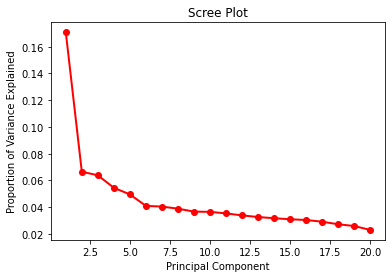

In [19]:
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print('20 PCs explain ', np.cumsum(pca_std.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
print(pca_std.explained_variance_ratio_*100) #printing the variance values as an array
PC_values = np.arange(pca_std.n_components_) + 1 #storing indices of PCA components
plt.plot(PC_values, pca_std.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))

X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

Normalization

17 PCs explain  [10.11530297 19.09035143 27.85164761 34.94952437 41.42974748 47.32801919
 52.5792326  57.73381878 62.29341585 66.08056206 69.69993435 73.08128199
 76.16219992 79.20133239 82.00339727 84.62953072 87.09388563] % of variance cumulatively


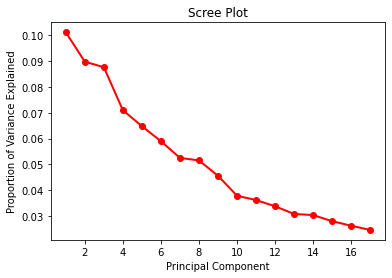

In [20]:
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print('17 PCs explain ', np.cumsum(pca_norm.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_norm.n_components_) + 1
plt.plot(PC_values, pca_norm.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

Full datasets

In [21]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

# Hyperparameter tuning using GridSearchCV

In [22]:
def tune_hyperparameters(model,X,y):
  param_grid = {
      'n_neighbors' : np.arange(5,20,2),
      'leaf_size' : np.arange(1,50,5),
      'weights' : ['uniform','distance']
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

# Without Scaling

In [23]:
best_parameters_raw = tune_hyperparameters(KNeighborsClassifier(),X_train,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 19, 'weights': 'distance'}


### With Standardization

In [24]:
best_parameters_std = tune_hyperparameters(KNeighborsClassifier(),X_train_standardized,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 19, 'weights': 'distance'}


### With Normalization

In [25]:
best_parameters_norm = tune_hyperparameters(KNeighborsClassifier(),X_train_normalized,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 19, 'weights': 'distance'}


# KNeighbors Classifier

In [26]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

### Without Scaling

Accuracy:  0.7719298245614035
Precision:  0.7607361963190185
Recall:  0.8266666666666667
F1 Score:  0.7923322683706071
Confusion Matrix:
 [[ 96  39]
 [ 26 124]]


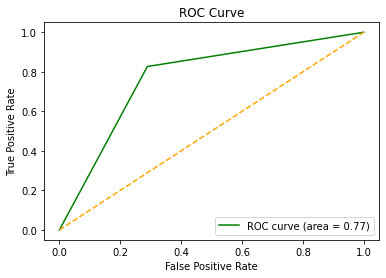

In [27]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_raw),X_train,y_train,X_test)

### With Standardization

Accuracy:  0.8421052631578947
Precision:  0.8776978417266187
Recall:  0.8133333333333334
F1 Score:  0.8442906574394463
Confusion Matrix:
 [[118  17]
 [ 28 122]]


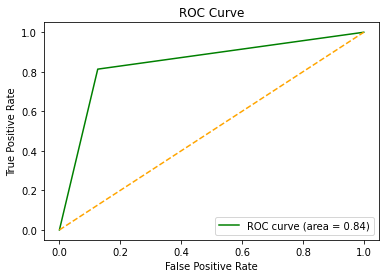

In [28]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_std),X_train_standardized,y_train,X_test_standardized)

### With Normalization

Accuracy:  0.8421052631578947
Precision:  0.8671328671328671
Recall:  0.8266666666666667
F1 Score:  0.8464163822525598
Confusion Matrix:
 [[116  19]
 [ 26 124]]


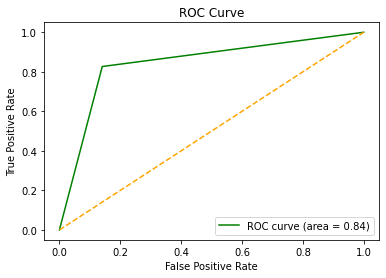

In [29]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_norm),X_train_normalized,y_train,X_test_normalized)

# K-Fold Cross Validation

In [30]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [31]:
metrics = []

### Without Scaling

In [32]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_raw),X,y))

Accuracy:  0.8238262322472849
Precision:  0.7401412892956233
Recall:  1.0
F1 Score:  0.8504684184857926


### With Standardization

In [33]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_std),X_standardized,y))

Accuracy:  0.9366917293233084
Precision:  0.8878763778220454
Recall:  1.0
F1 Score:  0.940540804884944


In [34]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_norm),X_normalized,y))

Accuracy:  0.9366972988025619
Precision:  0.8884510434024998
Recall:  1.0
F1 Score:  0.9406989368268637


# Performance and Comparison Plots

In [35]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.823826,0.740141,1.0,0.850468
With Standardization,0.936692,0.887876,1.0,0.940541
With Normalization,0.936697,0.888451,1.0,0.940699


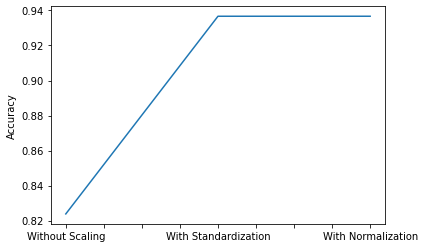

In [36]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

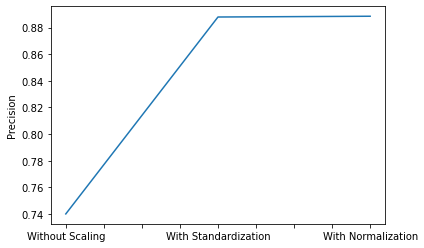

In [37]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

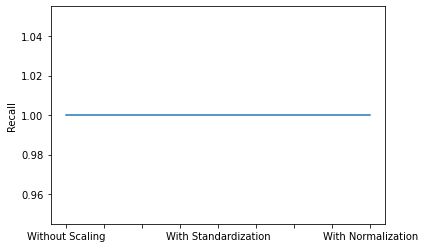

In [38]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

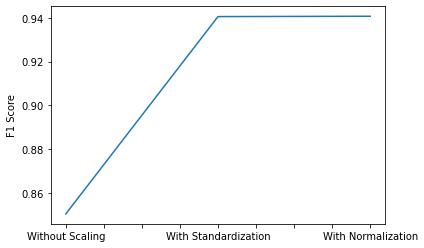

In [39]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()

# Oversampling


In [40]:
X=X2
y=Y2

# Spliting into Train and Test Sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Feature Scaling

PCA

20 PCs explain  [72.99466327 99.76964722] % of variance cumulatively


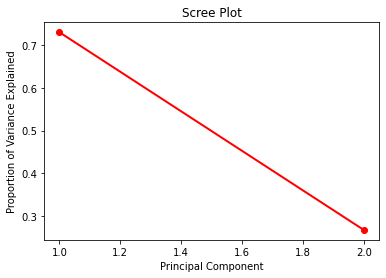

In [42]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print('20 PCs explain ', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Standardization

20 PCs explain  [16.65805829 23.42541774 29.53582864 34.96646191 39.95636568 44.10792623
 48.06650946 51.95635565 55.59331471 59.16994362 62.68219978 66.10412082
 69.37534145 72.55639302 75.64996648 78.71352054 81.67000025 84.48321754
 87.17855938 89.81071889] % of variance cumulatively


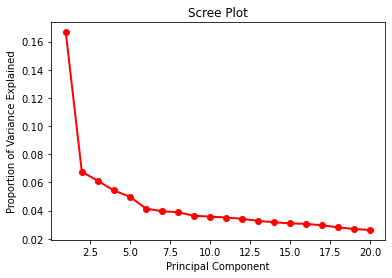

In [43]:
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print('20 PCs explain ', np.cumsum(pca_std.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_std.n_components_) + 1
plt.plot(PC_values, pca_std.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))

X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

Normalization

17 PCs explain  [ 9.60501258 18.91543769 27.33394828 34.25714118 40.872801   46.46293261
 51.86678572 57.02223092 61.74199811 65.62111575 69.27638857 72.73199762
 75.95011272 78.92358043 81.80839469 84.4983541  86.92479697] % of variance cumulatively


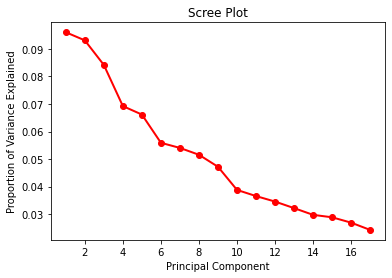

In [44]:
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print('17 PCs explain ', np.cumsum(pca_norm.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_norm.n_components_) + 1
plt.plot(PC_values, pca_norm.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

Full datasets

In [45]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

# Hyperparameter tuning using GridSearchCV

In [46]:
def tune_hyperparameters(model,X,y):
  param_grid = {
      'n_neighbors' : np.arange(5,20,2),
      'leaf_size' : np.arange(1,50,5),
      'weights' : ['uniform','distance']
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

# Without Scaling

In [47]:
best_parameters_raw = tune_hyperparameters(KNeighborsClassifier(),X_train,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}


### With Standardization

In [48]:
best_parameters_std = tune_hyperparameters(KNeighborsClassifier(),X_train_standardized,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}


### With Normalization

In [49]:
best_parameters_norm = tune_hyperparameters(KNeighborsClassifier(),X_train_normalized,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 19, 'weights': 'distance'}


# KNeighbors Classifier

In [51]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

### Without Scaling

Accuracy:  0.9581081081081081
Precision:  0.9230769230769231
Recall:  1.0
F1 Score:  0.9600000000000001
Confusion Matrix:
 [[674  62]
 [  0 744]]


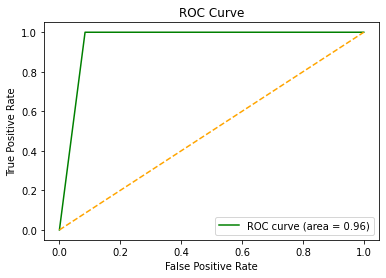

In [52]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_raw),X_train,y_train,X_test)

### With Standardization

Accuracy:  0.9716216216216216
Precision:  0.9465648854961832
Recall:  1.0
F1 Score:  0.9725490196078431
Confusion Matrix:
 [[694  42]
 [  0 744]]


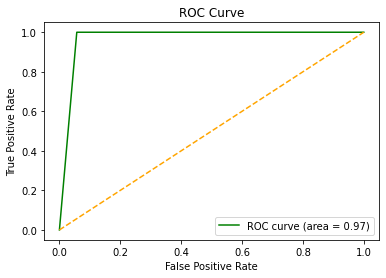

In [53]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_std),X_train_standardized,y_train,X_test_standardized)

### With Normalization

Accuracy:  0.9621621621621622
Precision:  0.93
Recall:  1.0
F1 Score:  0.9637305699481865
Confusion Matrix:
 [[680  56]
 [  0 744]]


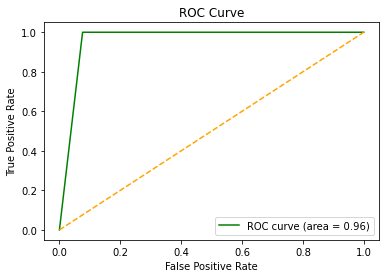

In [54]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_norm),X_train_normalized,y_train,X_test_normalized)

# K-Fold Cross Validation

In [55]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [56]:
metrics = []

### Without Scaling

In [57]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_raw),X,y))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


### With Standardization

In [58]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_std),X_standardized,y))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [59]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_norm),X_normalized,y))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


# Performance and Comparison Plots

In [60]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,1.0,1.0,1.0,1.0
With Standardization,1.0,1.0,1.0,1.0
With Normalization,1.0,1.0,1.0,1.0


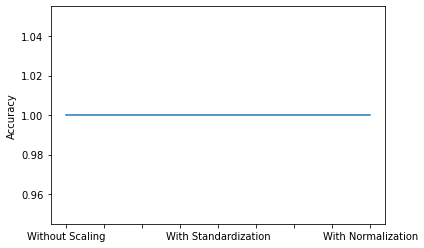

In [61]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

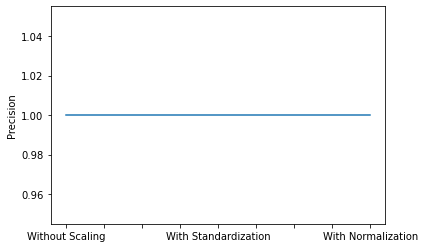

In [62]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

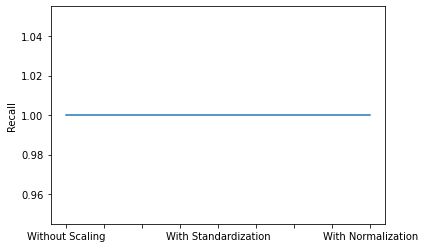

In [63]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

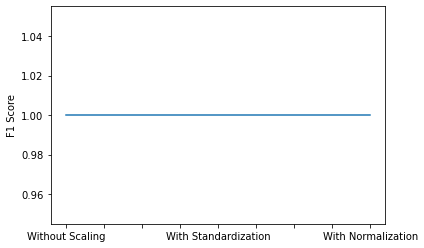

In [64]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()